In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
import pydotplus
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/songs_new.csv'

In [ ]:
encodings = ['utf-8', 'latin-1', 'ISO-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/drive/My Drive/songs_new.csv', encoding=encoding)
        print(f"File successfully loaded using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Error decoding with encoding: {encoding}")

Error decoding with encoding: utf-8
File successfully loaded using encoding: latin-1


In [ ]:
df.head()

,artist,song,song_name_len,duration_ms,explicit,year,popularity,hot,danceability,energy,...,valence,tempo,genre,pop,rock,hiphop,dance,folk,rnb,latin
0,DEV,In The Dark,11,226226,False,2012,52,0,0.736,0.824,...,0.4430,124.954,"pop, Dance/Electronic",1,0,0,1,0,0,0
1,Adele,Skyfall,7,286480,False,2012,74,0,0.346,0.552,...,0.0789,75.881,"pop, R&B",1,0,0,0,0,1,0
2,David Guetta,Turn Me On (feat. Nicki Minaj),30,199680,False,2012,65,0,0.704,0.793,...,0.4120,127.960,"hip hop, pop, Dance/Electronic",1,0,1,1,0,0,0
3,Maroon 5,One More Night,14,219546,False,2012,74,0,0.716,0.821,...,0.6180,92.997,pop,1,0,0,0,0,0,0
4,The Wanted,Chasing The Sun,15,198800,False,2012,69,0,0.637,0.732,...,0.6800,128.108,"pop, Dance/Electronic",1,0,0,1,0,0,0


In [ ]:
print(df)

           artist                            song  song_name_len  duration_ms  \
0             DEV                     In The Dark             11       226226   
1           Adele                         Skyfall              7       286480   
2    David Guetta  Turn Me On (feat. Nicki Minaj)             30       199680   
3        Maroon 5                  One More Night             14       219546   
4      The Wanted                 Chasing The Sun             15       198800   
..            ...                             ...            ...          ...   
296        Hinder                Lips Of An Angel             16       261053   
297        Hinder                  Better Than Me             14       223533   
298   Chris Brown                Beautiful People             16       225881   
299      t.A.T.u.         All The Things She Said             23       214440   
300    Will Smith                          Switch              6       197666   

     explicit  year  popula

In [ ]:
display(df.isna().sum())
df = df.dropna()

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

In [ ]:
df_summary = df.describe()
df_summary

,song_name_len,duration_ms,year,popularity,hot,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,18.468439,226028.511628,2013.318937,55.920266,0.199336,0.647801,0.737040,5.308970,-5.397937,0.564784,...,0.194555,0.525213,121.481704,0.880399,0.093023,0.335548,0.318937,0.003322,0.112957,0.019934
std,12.956974,37478.627093,1.526851,26.192244,0.400166,0.127955,0.148655,3.544134,1.909973,0.496611,...,0.146468,0.226221,24.130865,0.325035,0.290949,0.472968,0.466841,0.057639,0.317067,0.140005
min,2.000000,150400.000000,2012.000000,0.000000,0.000000,0.180000,0.054900,0.000000,-20.514000,0.000000,...,0.024100,0.038100,72.022000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,204280.000000,2012.000000,50.000000,0.000000,0.560000,0.652000,2.000000,-6.542000,0.000000,...,0.092700,0.357000,102.961000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,223386.000000,2013.000000,66.000000,0.000000,0.660000,0.771000,5.000000,-5.217000,1.000000,...,0.139000,0.517000,124.938000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,240400.000000,2014.000000,74.000000,0.000000,0.729000,0.844000,8.000000,-4.135000,1.000000,...,0.269000,0.701000,129.992000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,75.000000,484146.000000,2020.000000,89.000000,1.000000,0.964000,0.985000,11.000000,-1.569000,1.000000,...,0.853000,0.965000,196.093000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'hot', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df['popularity_outcome'] = None
index = 0
for row in df['popularity']:
  index += 1
  if row > 85:
      df['popularity_outcome'][index] = 1
  else:
      df['popularity_outcome'][index] = 0

<ipython-input-11-c692be84f429>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity_outcome'][index] = 0
<ipython-input-11-c692be84f429>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity_outcome'][index] = 1


In [ ]:
dff = df[['duration_ms', 'year', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']]

In [ ]:
dff.columns

Index(['duration_ms', 'year', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb',
       'latin'],
      dtype='object')

In [ ]:
dff

,duration_ms,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb,latin
0,226226,2012,0.736,0.824,-4.231,0.0672,0.00358,0.000921,0.3290,0.4430,124.954,1,0,0,1,0,0,0
1,286480,2012,0.346,0.552,-6.864,0.0282,0.41700,0.000000,0.1140,0.0789,75.881,1,0,0,0,0,1,0
2,199680,2012,0.704,0.793,-2.266,0.0591,0.04880,0.000000,0.5750,0.4120,127.960,1,0,1,1,0,0,0
3,219546,2012,0.716,0.821,-3.435,0.0314,0.05580,0.000000,0.0844,0.6180,92.997,1,0,0,0,0,0,0
4,198800,2012,0.637,0.732,-6.209,0.0965,0.24400,0.000000,0.4980,0.6800,128.108,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,261053,2019,0.474,0.744,-5.386,0.0341,0.02080,0.000001,0.2090,0.2380,129.005,1,1,0,0,0,0,0
297,223533,2019,0.451,0.682,-5.295,0.0290,0.20500,0.000000,0.1750,0.2540,139.913,1,1,0,0,0,0,0
298,225881,2019,0.415,0.775,-6.366,0.1610,0.06580,0.004310,0.0843,0.5360,127.898,1,0,1,0,0,1,0
299,214440,2020,0.527,0.834,-5.767,0.0474,0.04110,0.005990,0.1050,0.3810,179.920,1,0,0,0,0,0,0


In [ ]:
df['popularity_outcome'][0] = 0

<ipython-input-15-b72e73d2526b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity_outcome'][0] = 0


DECISION TREE

In [ ]:
# independent variables and dependent variables
X = (dff.iloc[:,:-1])
y = df['popularity_outcome']
y = y.astype('int')

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
X_train

,duration_ms,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb
263,189906,2014,0.830,0.520,-8.714,0.0376,0.000792,0.000013,0.0656,0.735,104.990,0,0,0,0,0,0
19,225146,2012,0.564,0.710,-4.920,0.0461,0.001250,0.000000,0.1090,0.393,91.972,1,0,1,0,0,1
14,234693,2012,0.616,0.862,-5.180,0.0973,0.001170,0.000000,0.1790,0.569,127.992,1,0,1,0,0,1
91,266600,2012,0.457,0.757,-5.177,0.0320,0.020600,0.000000,0.1460,0.417,102.961,1,1,0,0,1,0
211,184280,2014,0.544,0.915,-3.405,0.0841,0.129000,0.000914,0.1150,0.510,126.094,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,209160,2014,0.733,0.650,-3.539,0.0315,0.070300,0.000066,0.0829,0.348,110.003,1,0,0,1,0,0
255,188371,2014,0.645,0.832,-5.595,0.0294,0.001060,0.002640,0.1990,0.375,112.028,1,0,0,1,0,0
72,201000,2012,0.691,0.921,-1.702,0.0533,0.173000,0.000000,0.3310,0.800,130.072,1,0,1,1,0,0
235,228000,2014,0.525,0.803,-4.052,0.0492,0.001290,0.000868,0.2900,0.383,100.094,0,0,0,1,0,0


In [ ]:
X_test

,duration_ms,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pop,rock,hiphop,dance,folk,rnb
285,257333,2016,0.833,0.515,-5.000,0.0462,0.34700,0.001560,0.1160,0.400,97.007,1,0,0,0,0,0
248,203466,2014,0.753,0.801,-3.215,0.0296,0.40300,0.000000,0.1280,0.794,128.011,1,0,1,1,0,0
150,174120,2013,0.794,0.523,-7.829,0.1610,0.03310,0.000000,0.1560,0.560,86.307,1,0,1,0,0,1
217,194561,2014,0.794,0.510,-7.314,0.4200,0.05050,0.000002,0.0562,0.180,167.879,1,0,1,0,0,0
107,245186,2013,0.389,0.706,-6.849,0.0593,0.00260,0.000182,0.6860,0.238,179.911,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,208133,2014,0.829,0.510,-9.334,0.0369,0.00821,0.001400,0.0829,0.450,119.993,0,0,1,1,0,0
138,157293,2013,0.489,0.867,-3.121,0.0710,0.02500,0.000000,0.5860,0.409,162.131,1,0,0,0,0,0
127,210840,2013,0.504,0.785,-4.802,0.1040,0.07380,0.000000,0.2390,0.502,173.968,1,0,0,0,0,0
208,227000,2014,0.742,0.595,-7.510,0.1070,0.15000,0.000000,0.1110,0.431,101.013,1,0,1,1,0,1


In [ ]:
y_train

263    0
19     0
14     0
91     0
211    0
      ..
203    0
255    0
72     0
235    0
37     0
Name: popularity_outcome, Length: 210, dtype: int64

In [ ]:
y_test

285    0
248    0
150    0
217    0
107    0
      ..
225    0
138    0
127    0
208    0
280    0
Name: popularity_outcome, Length: 91, dtype: int64

In [ ]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_split = 5, random_state=1)

dt_clf = dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

In [ ]:
dff.columns.tolist()

['duration_ms',
 'year',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'pop',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin']

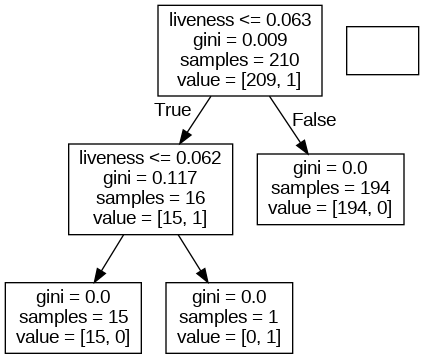

In [ ]:
feature_names = dff.columns.tolist()
feature_names = feature_names[0:17]
target_name = np.array(['Stay', 'Churn'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data
draw_decision_tree(dt_clf)

In [ ]:
import sklearn.metrics as mt

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)


Train_Accuracy:  1.0 

Accuracy:  0.98 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[89  1]
 [ 1  0]]


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(dt_clf, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.99 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[298   1]
 [  2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

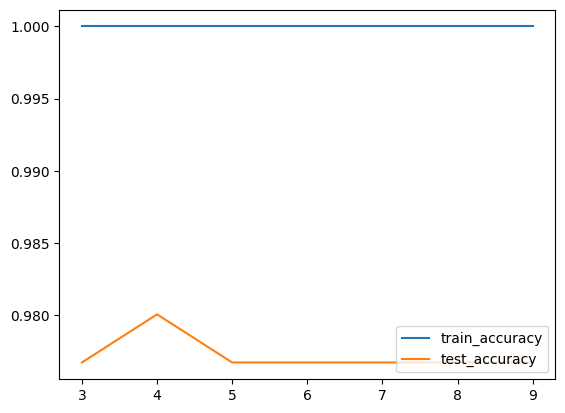

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
    train_accuracy.append(accuracy_score(y, model1.predict(X)))
    mean_test_accuracy.append(cross_val_score(model1, X, y, scoring="accuracy", cv=5).mean())


plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.legend(["train_accuracy", "test_accuracy"], loc ="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

t_clf = DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': [4, 5, 6],
              'min_samples_split': [5, 10, 15],
              'splitter': ['best', 'random'],}

grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv = 10 )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


,max_depth,min_samples_split,splitter,mean_test_score
9,5,10,random,0.995238
7,5,5,random,0.995238
15,6,10,random,0.995238
13,6,5,random,0.995238
11,5,15,random,0.995238
1,4,5,random,0.995238
17,6,15,random,0.995238
5,4,15,random,0.995238
3,4,10,random,0.995238
10,5,15,best,0.990476


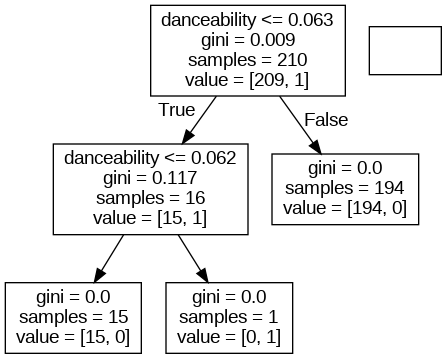

In [ ]:
dt_clf = DecisionTreeClassifier( max_depth=6, min_samples_split = 15, splitter= 'best', random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

feature_names = df.columns.tolist()
feature_names = feature_names[0:17]
target_name = np.array(['Churn', 'Stay'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data
draw_decision_tree(dt_clf)

**LOGISTIC REGRESSION**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # This is for train/test split
import sklearn.model_selection as ms               # This is for train/test split
from sklearn.metrics import confusion_matrix # This is for confusion matrix
import statsmodels.api as sm                        # This is for report

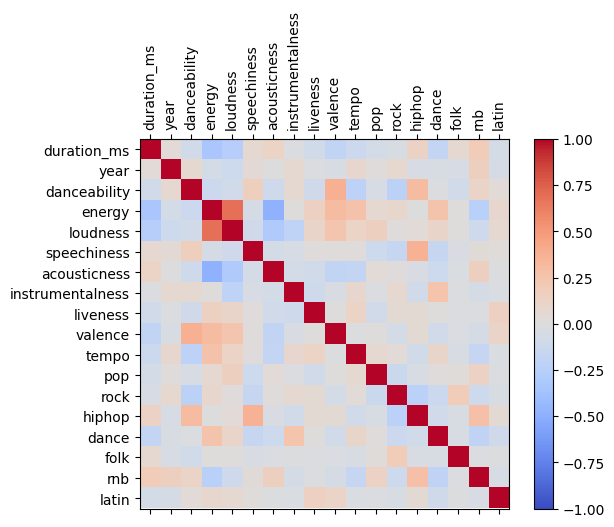

In [ ]:
import matplotlib.pyplot as plt
corr = dff.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dff.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dff.columns)
ax.set_yticklabels(dff.columns)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dff.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]

print(vif_data)

             feature         VIF
0        duration_ms   46.649562
1               year  309.978893
2       danceability   43.025117
3             energy   75.259919
4           loudness   19.204954
5        speechiness    2.702167
6       acousticness    1.920917
7   instrumentalness    1.237838
8           liveness    3.031840
9            valence    9.340238
10             tempo   31.245794
11               pop    9.345657
12              rock    1.359260
13            hiphop    2.181641
14             dance    1.967012
15              folk    1.054618
16               rnb    1.418831
17             latin    1.087022


In [ ]:
df_test = df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.values, i)
                          for i in range(len(df_test.columns))]

print(vif_data)

            feature        VIF
0      danceability  14.604289
1            energy  13.775797
2       speechiness   2.228394
3      acousticness   1.367514
4  instrumentalness   1.052517
5          liveness   2.820786


In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Train_Accuracy: ', model.score(X_train, y_train),'\n')

Train_Accuracy:  0.9952380952380953 



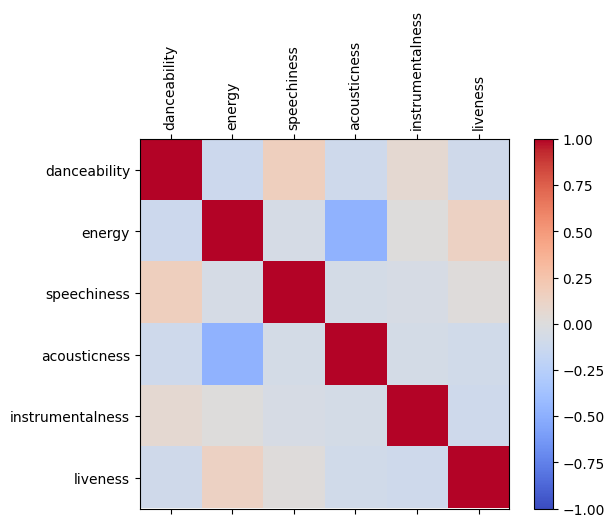

In [ ]:
import matplotlib.pyplot as plt
corr = df_test.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_test.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_test.columns)
ax.set_yticklabels(df_test.columns)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.values, i)
                          for i in range(len(df_test.columns))]

print(vif_data)

            feature        VIF
0      danceability  14.604289
1            energy  13.775797
2       speechiness   2.228394
3      acousticness   1.367514
4  instrumentalness   1.052517
5          liveness   2.820786


In [ ]:
df_test = dff

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.values, i)
                          for i in range(len(df_test.columns))]

print(vif_data)

             feature         VIF
0        duration_ms   46.649562
1               year  309.978893
2       danceability   43.025117
3             energy   75.259919
4           loudness   19.204954
5        speechiness    2.702167
6       acousticness    1.920917
7   instrumentalness    1.237838
8           liveness    3.031840
9            valence    9.340238
10             tempo   31.245794
11               pop    9.345657
12              rock    1.359260
13            hiphop    2.181641
14             dance    1.967012
15              folk    1.054618
16               rnb    1.418831
17             latin    1.087022


In [ ]:
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
results = model.fit(method='lbfgs')  # Using a different solver
features = list(dff.iloc[:, 0:-1].columns)
results.summary2(xname=features)

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit              Method:           MLE     
Dependent Variable: popularity_outcome Pseudo R-squared: -21.942 
Date:               2023-12-12 13:49   AIC:              325.1218
No. Observations:   210                BIC:              382.0226
Df Model:           16                 Log-Likelihood:   -145.56 
Df Residuals:       193                LL-Null:          -6.3447 
Converged:          1.0000             LLR p-value:      1.0000  
No. Iterations:     1.0000             Scale:            1.0000  
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
duration_ms          0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
year                 0.0000   0.0012 0.0000 1.0000 -0.0024 0.0024
danceability         0.0000   1.3230 0.0000 1.0000 -2.5931 2.5931
energy               0.0000   1.5657 0.0000 1.0000 -3.0687 3.0687
loudness             0.0000   0.1184 0.0000 1.0000 -0.2320 0.2320
speechiness          0.0000   2.0393 0.0000 1.0000 -3.9969 3.9969
acousticness         0.0000   1.0413 0.0000 1.0000 -2.0408 2.0408
instrumentalness     0.0000   1.5236 0.0000 1.0000 -2.9861 2.9861
liveness             0.0000   0.9456 0.0000 1.0000 -1.8533 1.8533
valence              0.0000   0.7425 0.0000 1.0000 -1.4552 1.4552
tempo                0.0000   0.0064 0.0000 1.0000 -0.0125 0.0125
pop                  0.0000   0.4436 0.0000 1.0000 -0.8695 0.8695
rock                 0.0000   0.5413 0.0000 1.0000 -1.0608 1.0608
hiphop               0.0000   0.3480 0.0000 1.0000 -0.6820 0.6820
dance                0.0000   0.3409 0.0000 1.0000 -0.6681 0.6681
folk                 0.0000   2.0809 0.0000 1.0000 -4.0784 4.0784
rnb                  0.0000   0.5096 0.0000 1.0000 -0.9989 0.9989
=================================================================

"""

In [ ]:
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.99 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[90  0]
 [ 1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

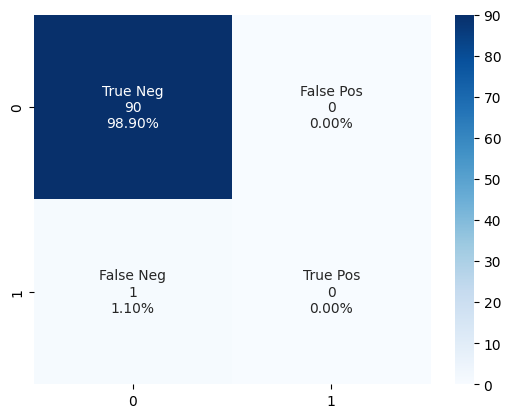

In [ ]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.99 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 



<Axes: >

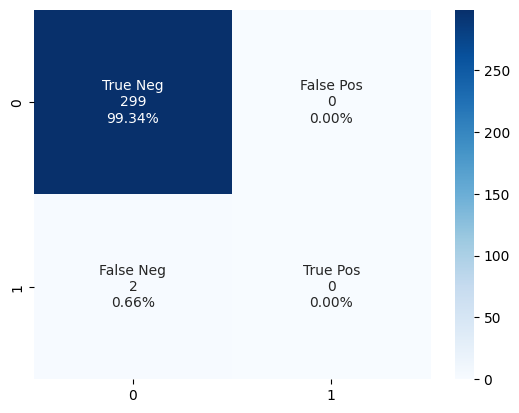

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = LogisticRegression()

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

**K-NEAREST NEIGHBOR**

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Train_Accuracy: ', model.score(X_train, y_train),'\n')

Train_Accuracy:  0.9952380952380953 



In [ ]:
import sklearn.metrics as mt

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.99 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[90  0]
 [ 1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = KNeighborsClassifier(n_neighbors = 3)

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.99 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[299   0]
 [  2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


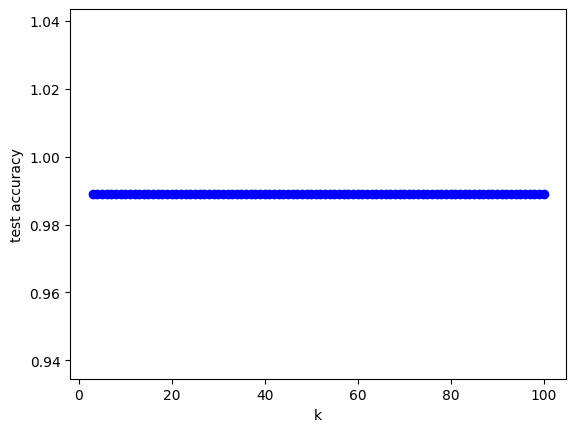

In [ ]:
import matplotlib.pyplot as plt

k_range = range(3,101)

accuracy_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(mt.accuracy_score(y_test, y_pred))

# k = sqrt(N)

plt.plot(k_range, accuracy_list, 'o--', color = 'blue')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = KNeighborsClassifier(n_neighbors = 50)

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.99 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[299   0]
 [  2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Q3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/My Drive/songs-3.csv'

In [ ]:
dataset_path1 = '/content/drive/My Drive/songs_new.csv'

In [ ]:
df1 = pd.read_csv(dataset_path)


In [ ]:
print(df1)

                artist                                 song  song_name_len  \
0        Missy Elliott                             Hot Boyz              8   
1            blink-182                 All The Small Things             20   
2           Faith Hill                              Breathe              7   
3                Sisqo                           Thong Song             10   
4      Destiny's Child                          Say My Name             11   
...                ...                                  ...            ...   
1194     Calvin Harris    Bounce (feat. Kelis) - Radio Edit             33   
1195      David Guetta            Without You (feat. Usher)             25   
1196  Carly Rae Jepsen                        Call Me Maybe             13   
1197              fun.  We Are Young (feat. Janelle Mon??e)             35   
1198         Sean Paul                     She Doesn't Mind             16   

      duration_ms  explicit  year  popularity  hot  danceabilit

In [ ]:
encodings = ['utf-8', 'latin-1', 'ISO-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/drive/My Drive/songs_new.csv', encoding=encoding)
        print(f"File successfully loaded using encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Error decoding with encoding: {encoding}")

Error decoding with encoding: utf-8
File successfully loaded using encoding: latin-1


In [ ]:
dff = pd.concat([df1, df], ignore_index=True)

In [ ]:
print(combined_df)

               artist                     song  song_name_len  duration_ms  \
0       Missy Elliott                 Hot Boyz              8       215466   
1           blink-182     All The Small Things             20       167066   
2          Faith Hill                  Breathe              7       250546   
3               Sisqo               Thong Song             10       253733   
4     Destiny's Child              Say My Name             11       271333   
...               ...                      ...            ...          ...   
1495           Hinder         Lips Of An Angel             16       261053   
1496           Hinder           Better Than Me             14       223533   
1497      Chris Brown         Beautiful People             16       225881   
1498         t.A.T.u.  All The Things She Said             23       214440   
1499       Will Smith                   Switch              6       197666   

      explicit  year  popularity  hot  danceability  energy  ..

In [ ]:
display(df.isna().sum())
df = df.dropna()

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
success             0
dtype: int64

In [ ]:
df_merged=combined_df[["song_name_len", "duration_ms", "popularity", "danceability", "energy", "valence", "tempo", "pop", "latin"]]

In [ ]:
df_merged.head()

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin
0,8,215466,49,0.727,0.445,0.527,81.125,1,0
1,20,167066,79,0.434,0.897,0.684,148.726,1,0
2,7,250546,66,0.529,0.496,0.278,136.859,1,0
3,10,253733,69,0.706,0.888,0.714,121.549,1,0
4,11,271333,75,0.713,0.678,0.734,138.009,1,0


In [ ]:
display(df_merged)

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin
0,8,215466,49,0.727,0.445,0.527,81.125,1,0
1,20,167066,79,0.434,0.897,0.684,148.726,1,0
2,7,250546,66,0.529,0.496,0.278,136.859,1,0
3,10,253733,69,0.706,0.888,0.714,121.549,1,0
4,11,271333,75,0.713,0.678,0.734,138.009,1,0
...,...,...,...,...,...,...,...,...,...
1495,16,261053,35,0.474,0.744,0.238,129.005,1,0
1496,14,223533,30,0.451,0.682,0.254,139.913,1,0
1497,16,225881,53,0.415,0.775,0.536,127.898,1,0
1498,23,214440,39,0.527,0.834,0.381,179.920,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Suppose we select two attributes
data = df_merged[['danceability', 'energy']]

# Scaling
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

modelkMEans = KMeans(n_clusters = 2, random_state = 1)
modelkMEans.fit(data_scale)
display(modelkMEans.fit_predict(data_scale))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
df_merged['cluster'] = modelkMEans.fit_predict(data_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-102-7963599391ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['cluster'] = modelkMEans.fit_predict(data_scale)


In [ ]:
display(df_merged)

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin,cluster
0,8,215466,49,0.727,0.445,0.527,81.125,1,0,0
1,20,167066,79,0.434,0.897,0.684,148.726,1,0,1
2,7,250546,66,0.529,0.496,0.278,136.859,1,0,0
3,10,253733,69,0.706,0.888,0.714,121.549,1,0,1
4,11,271333,75,0.713,0.678,0.734,138.009,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1495,16,261053,35,0.474,0.744,0.238,129.005,1,0,1
1496,14,223533,30,0.451,0.682,0.254,139.913,1,0,1
1497,16,225881,53,0.415,0.775,0.536,127.898,1,0,1
1498,23,214440,39,0.527,0.834,0.381,179.920,1,0,1


Logistic Regression for Cluster 1

In [ ]:
df_merged1 = df_merged[df_merged['cluster'] == 0].copy()
display(df_merged1)

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin,cluster
0,8,215466,49,0.727,0.445,0.527,81.125,1,0,0
2,7,250546,66,0.529,0.496,0.278,136.859,1,0,0
4,11,271333,75,0.713,0.678,0.734,138.009,1,0,0
7,23,294200,61,0.689,0.685,0.398,160.067,1,0,0
8,27,245400,64,0.761,0.716,0.649,119.410,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1490,5,262773,30,0.680,0.644,0.484,116.097,1,0,0
1491,40,244466,40,0.583,0.643,0.700,195.685,1,0,0
1493,13,237359,43,0.786,0.614,0.742,103.887,1,0,0
1494,11,359973,47,0.849,0.498,0.502,92.980,1,0,0


In [ ]:
data = df_merged1.drop(columns=['cluster'])
display(data)

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin
0,8,215466,49,0.727,0.445,0.527,81.125,1,0
2,7,250546,66,0.529,0.496,0.278,136.859,1,0
4,11,271333,75,0.713,0.678,0.734,138.009,1,0
7,23,294200,61,0.689,0.685,0.398,160.067,1,0
8,27,245400,64,0.761,0.716,0.649,119.410,1,0
...,...,...,...,...,...,...,...,...,...
1490,5,262773,30,0.680,0.644,0.484,116.097,1,0
1491,40,244466,40,0.583,0.643,0.700,195.685,1,0
1493,13,237359,43,0.786,0.614,0.742,103.887,1,0
1494,11,359973,47,0.849,0.498,0.502,92.980,1,0


In [ ]:
X = (data.iloc[:,:-1])
y = (data.iloc[:, -1])
y = y.astype('int')
X = scaler.fit_transform(X)

In [ ]:
import statsmodels.api as sm

mod = sm.Logit(y, X)
results = mod.fit(method="newton")

# Print the summary to inspect the coefficients
print(results.summary2())

# Ensure that the number of features matches the number of coefficients
features = list(df.iloc[:, 0:-1].columns)[:8]  # Adjust the index as needed

# Display the summary using the correct feature names
results.summary2(xname=features)

Optimization terminated successfully.
         Current function value: 0.110469
         Iterations 9
                        Results: Logit
Model:              Logit            Method:           MLE     
Dependent Variable: latin            Pseudo R-squared: 0.010   
Date:               2023-12-12 14:25 AIC:              184.7971
No. Observations:   764              BIC:              221.9057
Df Model:           7                Log-Likelihood:   -84.399 
Df Residuals:       756              LL-Null:          -85.254 
Converged:          1.0000           LLR p-value:      0.97412 
No. Iterations:     9.0000           Scale:            1.0000  
-----------------------------------------------------------------
        Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-----------------------------------------------------------------
x1     -0.3691     1.3973   -0.2641   0.7917    -3.1077    2.3696
x2     -5.5964     2.3670   -2.3643   0.0181   -10.2356   -0.9571
x3     -1.1576   

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: latin            Pseudo R-squared: 0.010   
Date:               2023-12-12 14:25 AIC:              184.7971
No. Observations:   764              BIC:              221.9057
Df Model:           7                Log-Likelihood:   -84.399 
Df Residuals:       756              LL-Null:          -85.254 
Converged:          1.0000           LLR p-value:      0.97412 
No. Iterations:     9.0000           Scale:            1.0000  
---------------------------------------------------------------
                Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
artist         -0.3691   1.3973 -0.2641 0.7917  -3.1077  2.3696
song           -5.5964   2.3670 -2.3643 0.0181 -10.2356 -0.9571
song_name_len  -1.1576   0.8113 -1.4268 0.1536  -2.7478  0.4325
duration_ms    -2.0068   1.7763 -1.1297 0.2586  -5.4884  1.4748
explicit       -1.2835   1.6247 -0.7900 0.4295  -4.4679  1.9008
year            2.5408   1.3475  1.8855 0.0594  -0.1003  5.1819
popularity     -1.8096   1.4695 -1.2315 0.2182  -4.6897  1.0705
hot            -0.3898   0.5673 -0.6871 0.4920  -1.5018  0.7221
===============================================================

"""

**Logistic Regression for Cluster 2**

In [ ]:
df_merged2 = df_merged[df_merged['cluster'] == 1].copy()
display(df_merged2)

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin,cluster
1,20,167066,79,0.434,0.897,0.684,148.726,1,0,1
3,10,253733,69,0.706,0.888,0.714,121.549,1,0,1
5,48,268863,56,0.745,0.958,0.960,129.962,1,0,1
6,11,285960,62,0.586,0.659,0.147,111.989,1,0,1
9,10,285426,64,0.740,0.876,0.825,127.002,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1492,13,275026,0,0.641,0.720,0.418,92.988,1,0,1
1495,16,261053,35,0.474,0.744,0.238,129.005,1,0,1
1496,14,223533,30,0.451,0.682,0.254,139.913,1,0,1
1497,16,225881,53,0.415,0.775,0.536,127.898,1,0,1


In [ ]:
data = df_merged1.drop(columns=['cluster'])
display(data)

,song_name_len,duration_ms,popularity,danceability,energy,valence,tempo,pop,latin
0,8,215466,49,0.727,0.445,0.527,81.125,1,0
2,7,250546,66,0.529,0.496,0.278,136.859,1,0
4,11,271333,75,0.713,0.678,0.734,138.009,1,0
7,23,294200,61,0.689,0.685,0.398,160.067,1,0
8,27,245400,64,0.761,0.716,0.649,119.410,1,0
...,...,...,...,...,...,...,...,...,...
1490,5,262773,30,0.680,0.644,0.484,116.097,1,0
1491,40,244466,40,0.583,0.643,0.700,195.685,1,0
1493,13,237359,43,0.786,0.614,0.742,103.887,1,0
1494,11,359973,47,0.849,0.498,0.502,92.980,1,0


In [ ]:
X = (data.iloc[:,:-1])
y = (data.iloc[:, -1])
y = y.astype('int')
X = scaler.fit_transform(X)

In [ ]:
import statsmodels.api as sm

# Assuming 'y' is your target variable and 'X' is your feature matrix
mod = sm.Logit(y, X)

# Fit the logistic regression model
results = mod.fit(method="newton")

# Print the summary to inspect the coefficients
print(results.summary2())

# Ensure that the number of features matches the number of coefficients
# It's important to match the number of features to the number of parameters (coefficients)
features = list(df.iloc[:, 0:-1].columns)[:8]  # Assuming X is a pandas DataFrame

# Display the summary using the correct feature names
results.summary2(xname=features)


Optimization terminated successfully.
         Current function value: 0.110469
         Iterations 9
                        Results: Logit
Model:              Logit            Method:           MLE     
Dependent Variable: latin            Pseudo R-squared: 0.010   
Date:               2023-12-12 14:30 AIC:              184.7971
No. Observations:   764              BIC:              221.9057
Df Model:           7                Log-Likelihood:   -84.399 
Df Residuals:       756              LL-Null:          -85.254 
Converged:          1.0000           LLR p-value:      0.97412 
No. Iterations:     9.0000           Scale:            1.0000  
-----------------------------------------------------------------
        Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-----------------------------------------------------------------
x1     -0.3691     1.3973   -0.2641   0.7917    -3.1077    2.3696
x2     -5.5964     2.3670   -2.3643   0.0181   -10.2356   -0.9571
x3     -1.1576   

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: latin            Pseudo R-squared: 0.010   
Date:               2023-12-12 14:30 AIC:              184.7971
No. Observations:   764              BIC:              221.9057
Df Model:           7                Log-Likelihood:   -84.399 
Df Residuals:       756              LL-Null:          -85.254 
Converged:          1.0000           LLR p-value:      0.97412 
No. Iterations:     9.0000           Scale:            1.0000  
---------------------------------------------------------------
                Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
artist         -0.3691   1.3973 -0.2641 0.7917  -3.1077  2.3696
song           -5.5964   2.3670 -2.3643 0.0181 -10.2356 -0.9571
song_name_len  -1.1576   0.8113 -1.4268 0.1536  -2.7478  0.4325
duration_ms    -2.0068   1.7763 -1.1297 0.2586  -5.4884  1.4748
explicit       -1.2835   1.6247 -0.7900 0.4295  -4.4679  1.9008
year            2.5408   1.3475  1.8855 0.0594  -0.1003  5.1819
popularity     -1.8096   1.4695 -1.2315 0.2182  -4.6897  1.0705
hot            -0.3898   0.5673 -0.6871 0.4920  -1.5018  0.7221
===============================================================

"""